# General Overview - Data Storytelling and Visualization

Now that we have a clean dataset, we can start visualizing our data to identify trends and anomalies. The original dataset comes from [NYC OpenData](https://data.cityofnewyork.us/Environment/2015-Street-Tree-Census-Tree-Data/uvpi-gqnh) and is called the 2015 Street Tree Census - Tree Data.

Some things to consider:

- Can you count something interesting?
- Can you find trends (e.g. high, low, increasing, decreasing, anomalies)?
- Can you make a bar plot or a histogram?
- Can you compare two related quantities?
- Can you make a scatterplot?
- Can you make a time-series plot?
- Looking at the plots, what are some insights you can make? Do you see any correlations? Is there a hypothesis you’d like to investigate further? What other questions do the insights lead you to ask?
- Now that you’ve asked questions, hopefully you’ve found some interesting insights. Is there a narrative or a way of presenting the insights using text and plots that tells a compelling story? What are some other trends/relationships you think will make the story more complete?

In [1]:
import pandas as pd
import numpy as np
from numpy.random import seed
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [2]:
data = pd.read_csv('tree_census_cleaned.csv', index_col=0) # import data
tree = data.copy() # save a copy of data as tree

In [3]:
tree.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 651535 entries, 0 to 683787
Data columns (total 21 columns):
tree_id       651535 non-null int64
tree_dbh      651535 non-null int64
curb_loc      651535 non-null object
health        651535 non-null object
spc_common    651535 non-null object
steward       651535 non-null object
guards        651535 non-null object
sidewalk      651535 non-null object
problems      651535 non-null object
root_stone    651535 non-null object
root_grate    651535 non-null object
root_other    651535 non-null object
trunk_wire    651535 non-null object
trnk_light    651535 non-null object
trnk_other    651535 non-null object
brch_light    651535 non-null object
brch_shoe     651535 non-null object
brch_other    651535 non-null object
borough       651535 non-null object
longitude     651535 non-null float64
latitude      651535 non-null float64
dtypes: float64(2), int64(2), object(17)
memory usage: 109.4+ MB


In [4]:
tree.head()

tree_id  tree_dbh curb_loc health       spc_common steward guards  \
0   180683         3   OnCurb   Fair        red maple    None   None   
1   200540        21   OnCurb   Fair          pin oak    None   None   
2   204026         3   OnCurb   Good      honeylocust    1or2   None   
3   204337        10   OnCurb   Good      honeylocust    None   None   
4   189565        21   OnCurb   Good  American linden    None   None   

   sidewalk problems root_stone  ... root_other trunk_wire trnk_light  \
0  NoDamage     None         No  ...         No         No         No   
1    Damage   Stones        Yes  ...         No         No         No   
2    Damage     None         No  ...         No         No         No   
3    Damage   Stones        Yes  ...         No         No         No   
4    Damage   Stones        Yes  ...         No         No         No   

  trnk_other brch_light brch_shoe brch_other   borough  longitude   latitude  
0         No         No        No         No    Queens -73.844215  40.723092  
1         No         No        No         No    Queens -73.818679  40.794111  
2         No         No        No         No  Brooklyn -73.936608  40.717581  
3         No         No        No         No  Brooklyn -73.934456  40.713537  
4         No         No        No         No  Brooklyn -73.975979  40.666778  

[5 rows x 21 columns]

More information on what each column name stands for:

<table>
<tr>
<th>Column Name</th>
<th>Description</th>
<th>Data Type</th>
</tr>

<tr>
<td>tree_id</td>
<td>Unique identification number for each tree point.</td>
<td>Number</td>
</tr>

<tr>
<td>tree_dbh</td>	
<td>Diameter of the tree, measured at approximately 54" / 137cm above the ground. Data was collected for both living and dead trees; for stumps, use stump_diam</td>
<td>Number</td>
</tr>

<tr>
<td>curb_loc</td>
<td>Location of tree bed in relationship to the curb; trees are either along the curb (OnCurb) or offset from the curb (OffsetFromCurb)</td>
<td>Plain Text</td>
</tr>

<tr>
<td>health</td>
<td>Indicates the user's perception of tree health.</td>
<td>Plain Text</td>
</tr>

<tr>
<td>spc_common</td>
<td>Common name for species, e.g. "red maple"</td>
<td>Plain Text</td>
</tr>

<tr>
<td>steward</td>
<td>Indicates the number of unique signs of stewardship observed for this tree. Not recorded for stumps or dead trees.</td>
<td>Plain Text</td>
</tr>

<tr>
<td>guards</td>
<td>Indicates whether a guard is present, and if the user felt it was a helpful or harmful guard. Not recorded for dead trees and stumps.</td>
<td>Plain Text</td>
</tr>

<tr>
<td>sidewalk</td>
<td>Indicates whether one of the sidewalk flags immediately adjacent to the tree was damaged, cracked, or lifted. Not recorded for dead trees and stumps.</td>
<td>Plain Text</td>
</tr>

<tr>
<td>problems</td>
<td></td>
<td>Plain Text</td>
</tr>

<tr>
<td>root_stone</td>
<td>Indicates the presence of a root problem caused by paving stones in tree bed</td>
<td>Plain Text</td>
</tr>

<tr>
<td>root_grate</td>
<td>Indicates the presence of a root problem caused by metal grates in tree bed</td>
<td>Plain Text</td>
</tr>

<tr>
<td>root_other</td>
<td>Indicates the presence of other root problems</td>
<td>Plain Text</td>
</tr>

<tr>
<td>trunk_wire</td>
<td>Indicates the presence of a trunk problem caused by wires or rope wrapped around the trunk</td>
<td>Plain Text</td>
</tr>

<tr>
<td>trnk_light</td>
<td>Indicates the presence of a trunk problem caused by lighting installed on the tree</td>
<td>Plain Text</td>
</tr>

<tr>
<td>trnk_other</td>
<td>Indicates the presence of other trunk problems</td>
<td>Plain Text</td>
</tr>

<tr>
<td>brch_light</td>
<td>Indicates the presence of a branch problem caused by lights (usually string lights) or wires in the branches</td>
<td>Plain Text</td>
</tr>

<tr>
<td>brch_shoe</td>
<td>Indicates the presence of a branch problem caused by sneakers in the branches</td>
<td>Plain Text</td>
</tr>

<tr>
<td>brch_other</td>
<td>Indicates the presence of other branch problems</td>
<td>Plain Text</td>
</tr>

<tr>
<td>borough</td>
<td>Name of borough in which tree point is located</td>
<td>Plain Text</td>
</tr>

<tr>
<td>latitude</td>
<td>Latitude of point, in decimal degrees</td>
<td>Number</td>
</tr>

<tr>
<td>longitude</td>
<td>Longitude of point, in decimal degrees</td>
<td>Number</td>
</tr>
</table>

In [5]:
tree_health = tree.health.value_counts().reset_index() # taking a look at the overall tree health
tree_health.columns = ['Health', 'Trees']
tree_health

Health   Trees
0   Good  528327
1   Fair   96427
2   Poor   26781

In [6]:
tree_health_per = tree.health.value_counts(normalize=True).reset_index() # percentage
tree_health_per.columns = ['Health', 'Percentage']
tree_health_per

Health  Percentage
0   Good    0.810896
1   Fair    0.148000
2   Poor    0.041104

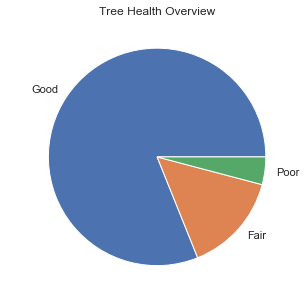

In [7]:
tree_health_per.index = ['Good', 'Fair', 'Poor']
tree_health_per.plot.pie(y='Percentage', figsize=(5, 5), legend=False).set_ylabel(' ')
plt.title('Tree Health Overview')
plt.show()

Trees in NYC are mostly in good condition: 81.1% are in good condition, 14.8% are in fair condition, and only 4.11% are in poor condition.

Based on this distribution, the data is very unbalanced. This will be a challenge for the machine learning portion. We will need to either oversample or undersample the data in order to create a more balanced dataset.

## Quality of Trees in Each Borough

In [8]:
tree_borough = tree.borough.value_counts().reset_index() # number of trees in each borough
tree_borough.columns = ['Borough', 'Trees']
tree_borough

Borough   Trees
0         Queens  237702
1       Brooklyn  169633
2  Staten Island  101282
3          Bronx   80517
4      Manhattan   62401

In [9]:
tree_borough_per = tree.borough.value_counts(normalize=True).reset_index() # percentage
tree_borough_per.columns = ['Borough', 'Percentage']
tree_borough_per

Borough  Percentage
0         Queens    0.364834
1       Brooklyn    0.260359
2  Staten Island    0.155451
3          Bronx    0.123580
4      Manhattan    0.095775

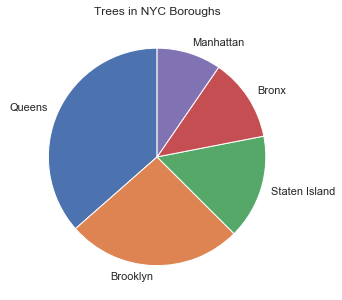

In [10]:
tree_borough_per.index = ['Queens', 'Brooklyn', 'Staten Island', 'Bronx', 'Manhattan']
tree_borough_per.plot.pie(y='Percentage', figsize=(5, 5), startangle=90, legend=False).set_ylabel(' ')
plt.title('Trees in NYC Boroughs')
plt.show()

The majority of trees are in Queens (36.49%), followed by Brooklyn (26.03%), Staten Island (15.55%), the Bronx (12.36%), and Manhattan (9.57%).

In [11]:
tree.groupby('borough')['health'].value_counts()

borough        health
Bronx          Good       66546
               Fair       10879
               Poor        3092
Brooklyn       Good      138119
               Fair       25060
               Poor        6454
Manhattan      Good       47338
               Fair       11456
               Poor        3607
Queens         Good      193789
               Fair       34512
               Poor        9401
Staten Island  Good       82535
               Fair       14520
               Poor        4227
Name: health, dtype: int64

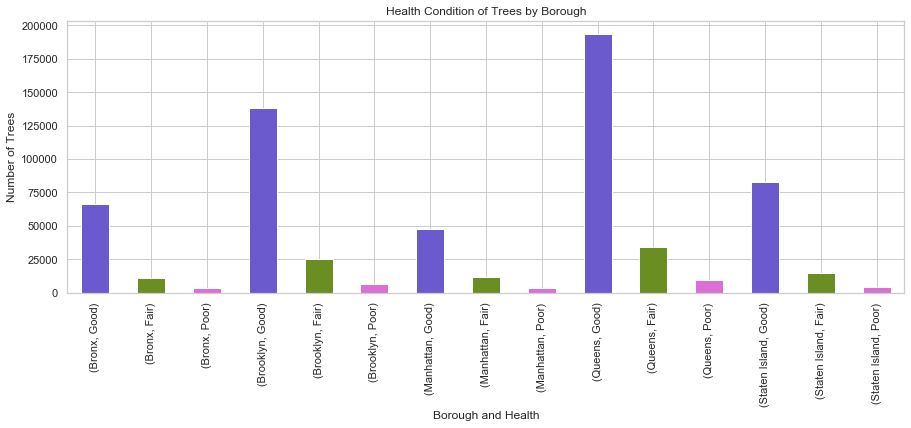

In [12]:
plt.figure(figsize=(15, 5))
tree.groupby('borough')['health'].value_counts().plot(kind='bar', color=['slateblue', 'olivedrab', 'orchid'])
plt.xlabel('Borough and Health')
plt.ylabel('Number of Trees')
plt.title('Health Condition of Trees by Borough')
plt.show()

In [13]:
tree.groupby('borough')['health'].value_counts(normalize=True)

borough        health
Bronx          Good      0.826484
               Fair      0.135114
               Poor      0.038402
Brooklyn       Good      0.814222
               Fair      0.147731
               Poor      0.038047
Manhattan      Good      0.758610
               Fair      0.183587
               Poor      0.057804
Queens         Good      0.815260
               Fair      0.145190
               Poor      0.039550
Staten Island  Good      0.814903
               Fair      0.143362
               Poor      0.041735
Name: health, dtype: float64

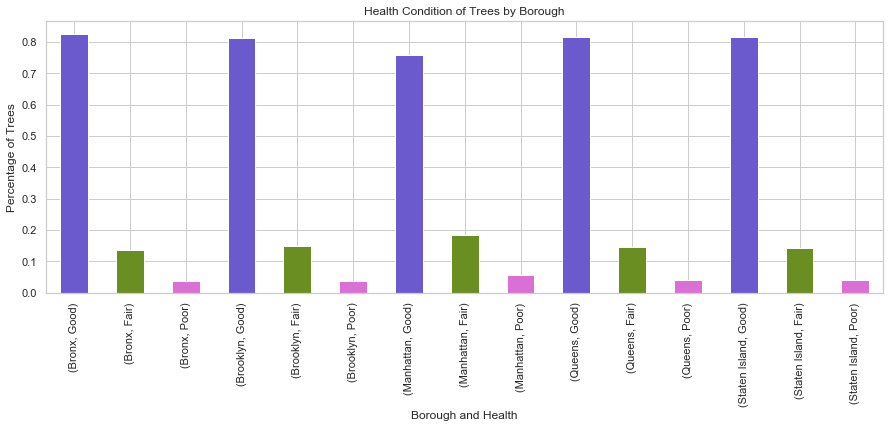

In [14]:
plt.figure(figsize=(15, 5))
tree.groupby('borough')['health'].value_counts(normalize=True).plot(kind='bar', color=['slateblue', 'olivedrab', 'orchid'])
plt.xlabel('Borough and Health')
plt.ylabel('Percentage of Trees')
plt.title('Health Condition of Trees by Borough')
plt.show()

The Bronx has the highest percentage of good trees (82.65%). Manhattan has the highest percentage of fair (18.36%) and poor (5.78%) trees out of all five boroughs.

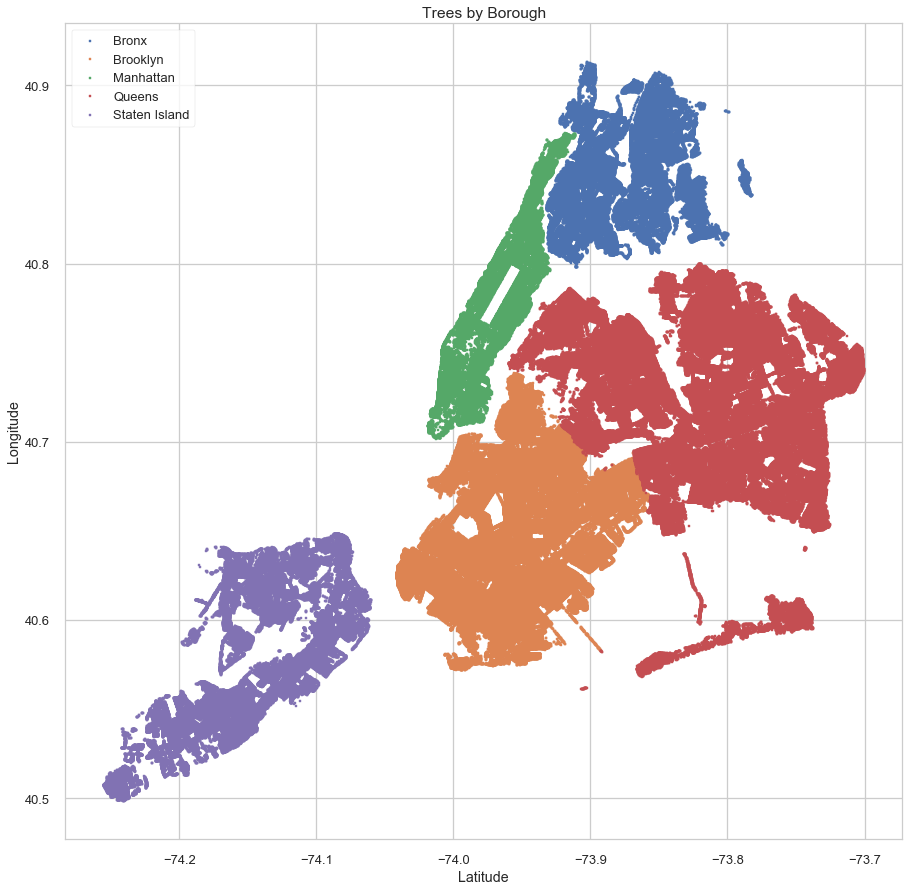

In [15]:
# plotting trees on a map

trees_bronx_scat = tree[tree.borough == 'Bronx']
trees_brooklyn_scat = tree[tree.borough == 'Brooklyn']
trees_manhattan_scat = tree[tree.borough == 'Manhattan']
trees_queens_scat = tree[tree.borough == 'Queens']
trees_staten_scat = tree[tree.borough == 'Staten Island']

plt.style.use('seaborn-talk')
plt.figure(figsize=(15, 15))
plt.scatter(trees_bronx_scat.longitude, trees_bronx_scat.latitude, label='Bronx', marker='s', s=3)
plt.scatter(trees_brooklyn_scat.longitude, trees_brooklyn_scat.latitude, label='Brooklyn', marker='s', s=3)
plt.scatter(trees_manhattan_scat.longitude, trees_manhattan_scat.latitude, label='Manhattan', marker='s', s=3)
plt.scatter(trees_queens_scat.longitude, trees_queens_scat.latitude, label='Queens', marker='s', s=3)
plt.scatter(trees_staten_scat.longitude, trees_staten_scat.latitude, label='Staten Island', marker='s', s=3)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Trees by Borough')
plt.legend(loc='upper left')
plt.show()

Let's take a look at the distribution of trees in each borough. Since the majority of trees are in good health, we are giving them a lighter color to better observe the areas of fair and poor trees.

### Bronx

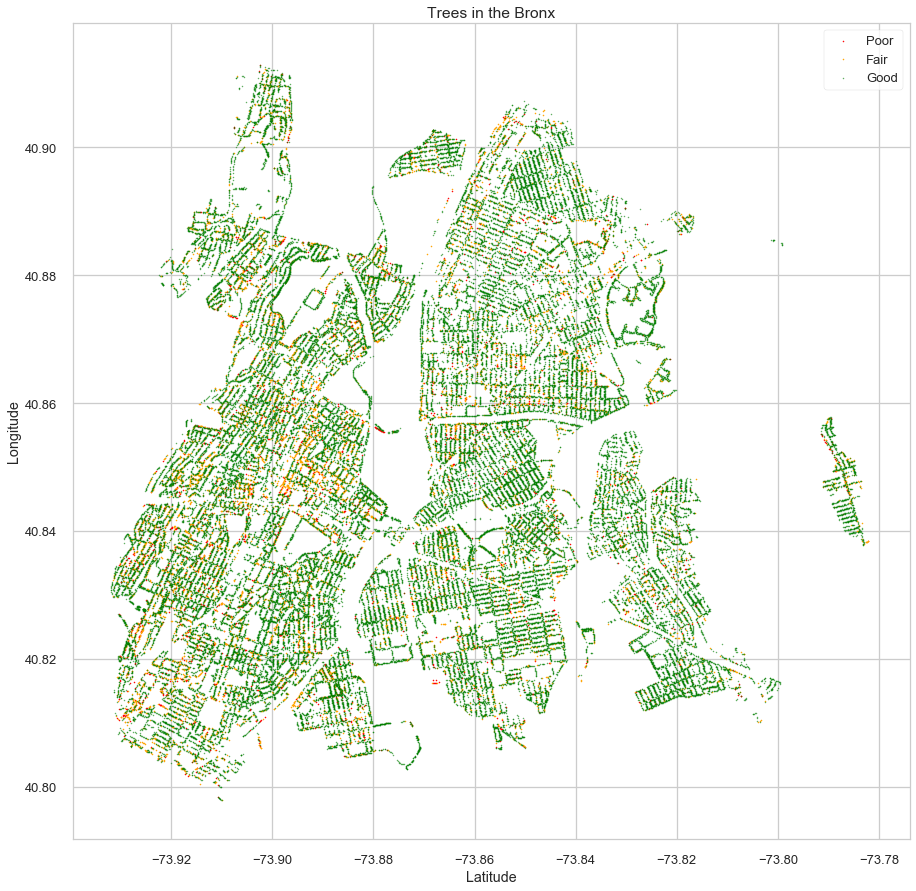

In [16]:
bronx_good = tree[(tree.health == 'Good') & (tree.borough == 'Bronx')][['longitude', 'latitude']]
bronx_fair = tree[(tree.health == 'Fair') & (tree.borough == 'Bronx')][['longitude', 'latitude']]
bronx_poor = tree[(tree.health == 'Poor') & (tree.borough == 'Bronx')][['longitude', 'latitude']]

plt.figure(figsize=(15, 15))
plt.scatter(bronx_poor.longitude, bronx_poor.latitude, c='red', label='Poor', marker='.', s=5)
plt.scatter(bronx_fair.longitude, bronx_fair.latitude, c='orange', label='Fair', marker='.', s=5)
plt.scatter(bronx_good.longitude, bronx_good.latitude, c='green', label='Good', marker='.', s=5, alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Trees in the Bronx')
plt.legend(loc='upper right')
plt.show()

### Brookyln

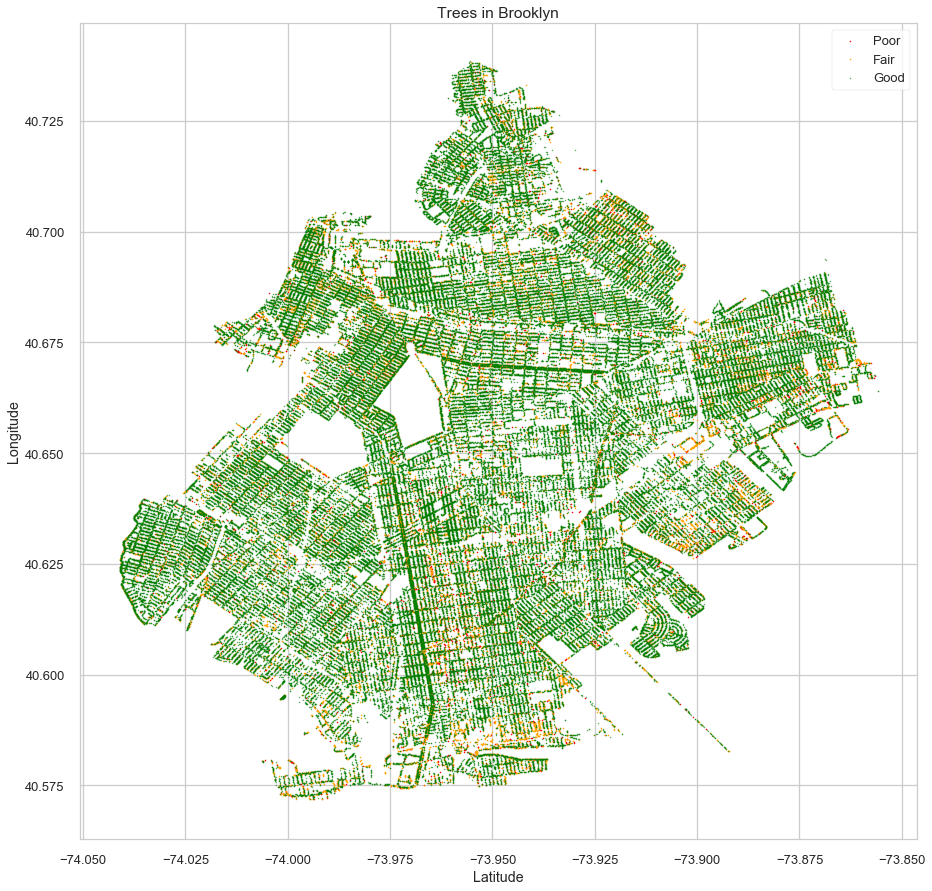

In [17]:
brooklyn_good = tree[(tree.health == 'Good') & (tree.borough == 'Brooklyn')][['longitude', 'latitude']]
brooklyn_fair = tree[(tree.health == 'Fair') & (tree.borough == 'Brooklyn')][['longitude', 'latitude']]
brooklyn_poor = tree[(tree.health == 'Poor') & (tree.borough == 'Brooklyn')][['longitude', 'latitude']]

plt.figure(figsize=(15, 15))
plt.scatter(brooklyn_poor.longitude, brooklyn_poor.latitude, c='red', label='Poor', marker='.', s=5)
plt.scatter(brooklyn_fair.longitude, brooklyn_fair.latitude, c='orange', label='Fair', marker='.', s=5)
plt.scatter(brooklyn_good.longitude, brooklyn_good.latitude, c='green', label='Good', marker='.', s=5, alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Trees in Brooklyn')
plt.legend(loc='upper right')
plt.show()

### Manhattan

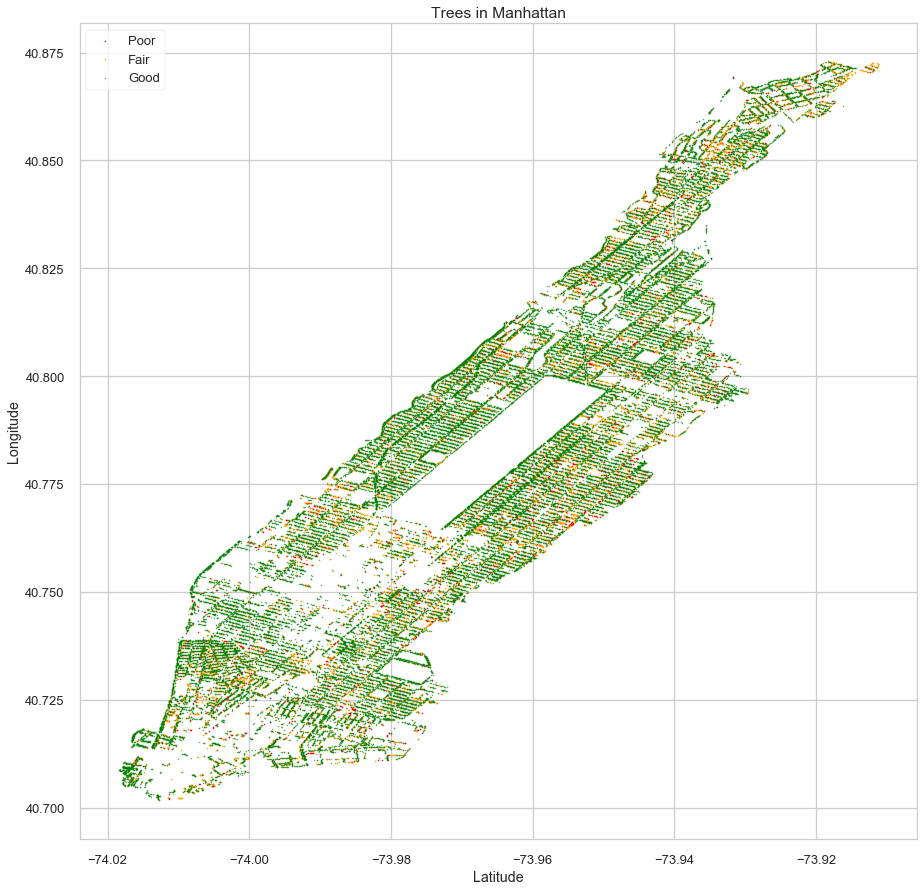

In [18]:
manhattan_good = tree[(tree.health == 'Good') & (tree.borough == 'Manhattan')][['longitude', 'latitude']]
manhattan_fair = tree[(tree.health == 'Fair') & (tree.borough == 'Manhattan')][['longitude', 'latitude']]
manhattan_poor = tree[(tree.health == 'Poor') & (tree.borough == 'Manhattan')][['longitude', 'latitude']]

plt.figure(figsize=(15, 15))
plt.scatter(manhattan_poor.longitude, manhattan_poor.latitude, c='red', label='Poor', marker='.', s=5)
plt.scatter(manhattan_fair.longitude, manhattan_fair.latitude, c='orange', label='Fair', marker='.', s=5)
plt.scatter(manhattan_good.longitude, manhattan_good.latitude, c='green', label='Good', marker='.', s=5, alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Trees in Manhattan')
plt.legend(loc='upper left')
plt.show()

### Queens

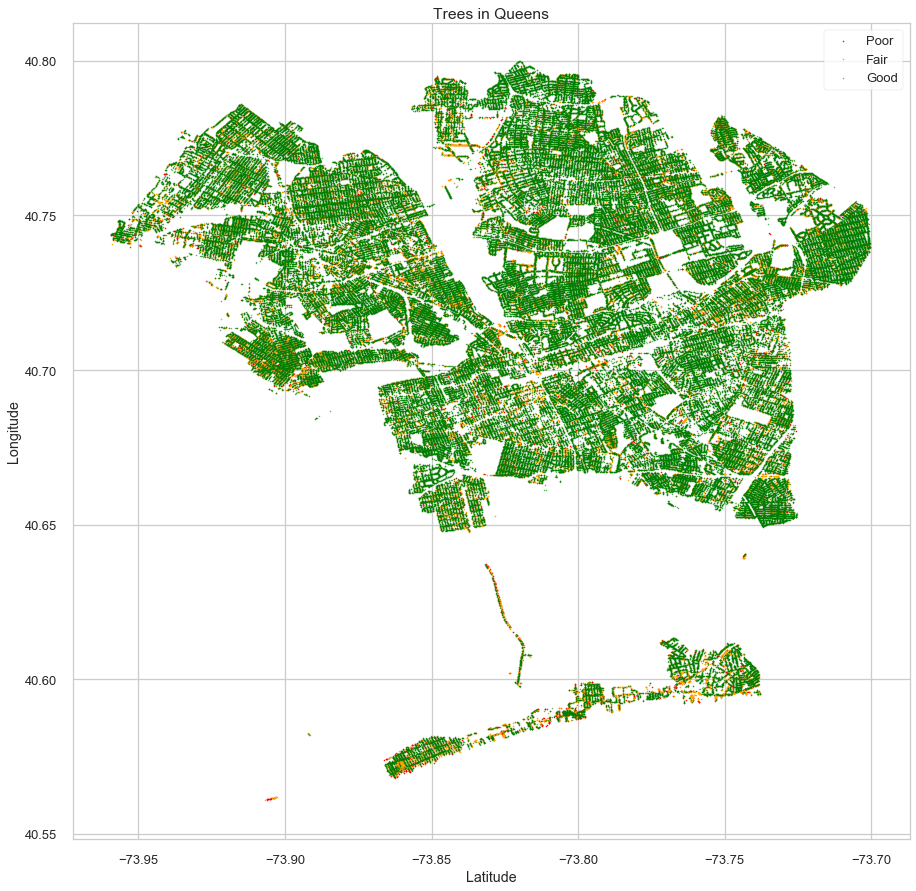

In [19]:
queens_good = tree[(tree.health == 'Good') & (tree.borough == 'Queens')][['longitude', 'latitude']]
queens_fair = tree[(tree.health == 'Fair') & (tree.borough == 'Queens')][['longitude', 'latitude']]
queens_poor = tree[(tree.health == 'Poor') & (tree.borough == 'Queens')][['longitude', 'latitude']]

plt.figure(figsize=(15, 15))
plt.scatter(queens_poor.longitude, queens_poor.latitude, c='red', label='Poor', marker='.', s=5)
plt.scatter(queens_fair.longitude, queens_fair.latitude, c='orange', label='Fair', marker='.', s=5)
plt.scatter(queens_good.longitude, queens_good.latitude, c='green', label='Good', marker='.', s=5, alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Trees in Queens')
plt.legend(loc='upper right')
plt.show()

### Staten Island

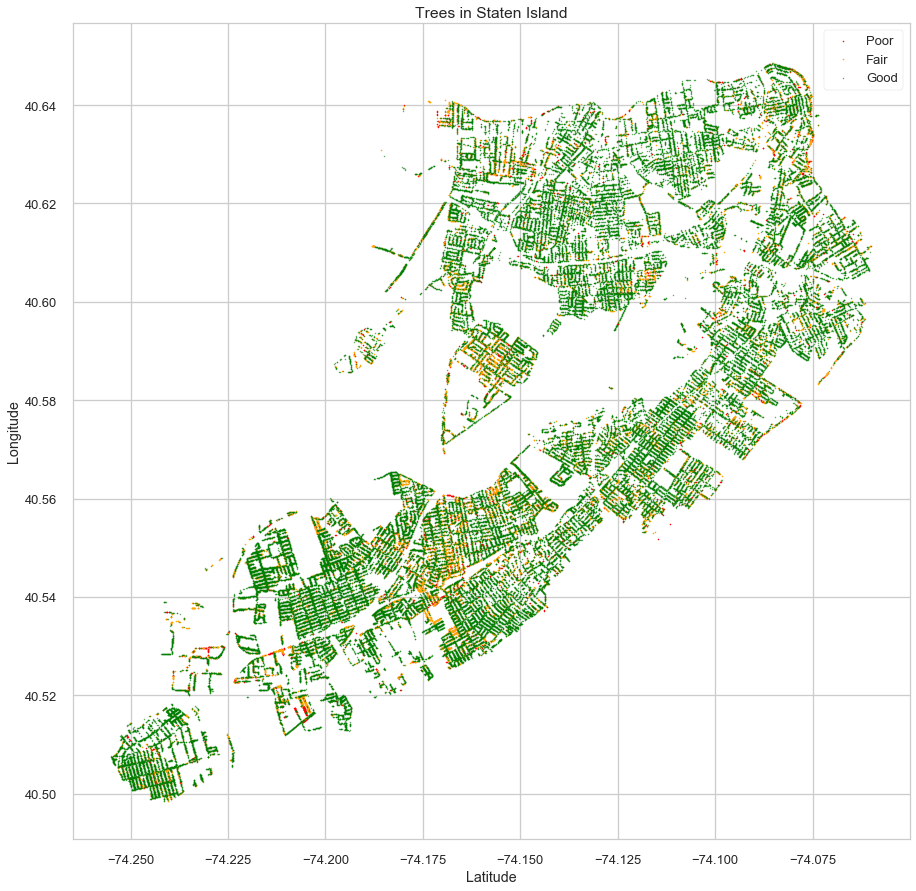

In [20]:
staten_good = tree[(tree.health == 'Good') & (tree.borough == 'Staten Island')][['longitude', 'latitude']]
staten_fair = tree[(tree.health == 'Fair') & (tree.borough == 'Staten Island')][['longitude', 'latitude']]
staten_poor = tree[(tree.health == 'Poor') & (tree.borough == 'Staten Island')][['longitude', 'latitude']]

plt.figure(figsize=(15, 15))
plt.scatter(staten_poor.longitude, staten_poor.latitude, c='red', label='Poor', marker='.', s=5)
plt.scatter(staten_fair.longitude, staten_fair.latitude, c='orange', label='Fair', marker='.', s=5)
plt.scatter(staten_good.longitude, staten_good.latitude, c='green', label='Good', marker='.', s=5, alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Trees in Staten Island')
plt.legend(loc='upper right')
plt.show()

## Stewardships and Tree Health

The Parks & Rec website define 'steward' as 'the number of unique signs of stewardship observed for this tree.'

In [21]:
tree_steward = tree.steward.value_counts().reset_index() # stewards per tree
tree_steward.columns = ['Stewards', 'Trees']
tree_steward

Stewards   Trees
0     None  487366
1     1or2  143390
2     3or4   19170
3  4orMore    1609

In [22]:
tree_steward_per = tree.steward.value_counts(normalize=True).reset_index() # percentage
tree_steward_per.columns = ['Steward', 'Percentage']
tree_steward_per

Steward  Percentage
0     None    0.748027
1     1or2    0.220080
2     3or4    0.029423
3  4orMore    0.002470

The majority of trees (74.81%) do not have a steward.

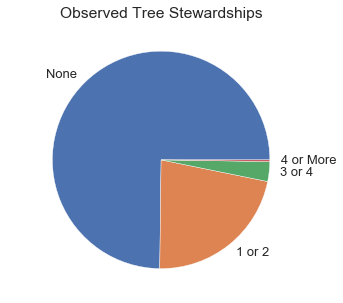

In [23]:
# visualizing stewardship

tree_steward_per.index = ['None', '1 or 2', '3 or 4', '4 or More']
tree_steward_per.plot.pie(y='Percentage', figsize=(5, 5), legend=False).set_ylabel(' ')
plt.title('Observed Tree Stewardships')
plt.show()

In [24]:
tree.groupby('steward')['health'].value_counts()

steward  health
1or2     Good      115231
         Fair       21883
         Poor        6276
3or4     Good       15594
         Fair        2829
         Poor         747
4orMore  Good        1360
         Fair         200
         Poor          49
None     Good      396142
         Fair       71515
         Poor       19709
Name: health, dtype: int64

In [25]:
tree.groupby('steward')['health'].value_counts(normalize=True)

steward  health
1or2     Good      0.803619
         Fair      0.152612
         Poor      0.043769
3or4     Good      0.813459
         Fair      0.147574
         Poor      0.038967
4orMore  Good      0.845245
         Fair      0.124301
         Poor      0.030454
None     Good      0.812822
         Fair      0.146738
         Poor      0.040440
Name: health, dtype: float64

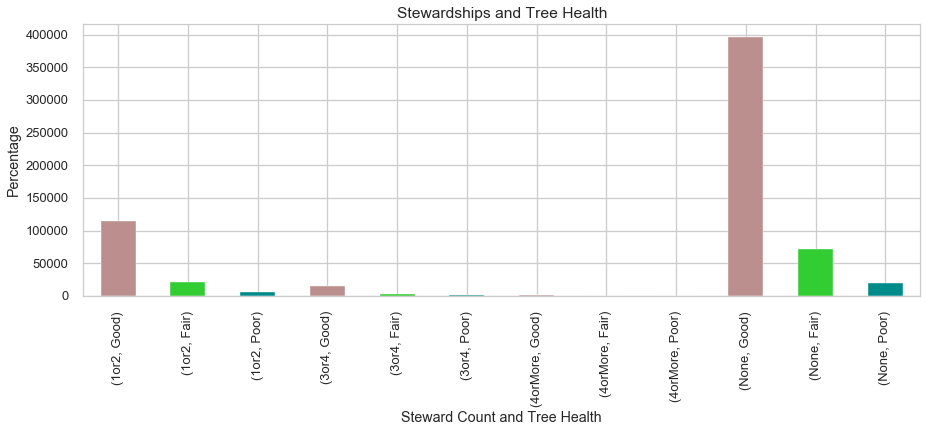

In [26]:
plt.figure(figsize=(15, 5))
tree.groupby('steward')['health'].value_counts().plot(kind='bar', color=['rosybrown', 'limegreen', 'darkcyan'])
plt.xlabel('Steward Count and Tree Health')
plt.ylabel('Percentage')
plt.title('Stewardships and Tree Health')
plt.show()

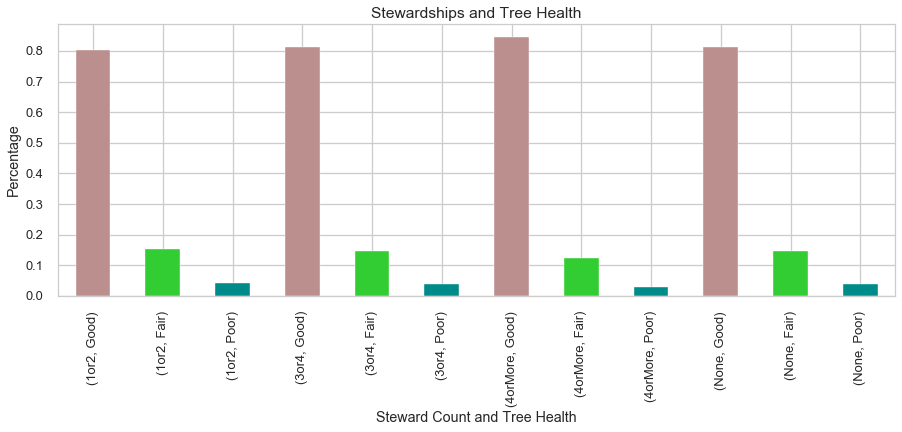

In [27]:
plt.figure(figsize=(15, 5))
tree.groupby('steward')['health'].value_counts(normalize=True).plot(kind='bar', color=['rosybrown', 'limegreen', 'darkcyan'])
plt.xlabel('Steward Count and Tree Health')
plt.ylabel('Percentage')
plt.title('Stewardships and Tree Health')
plt.show()

Of the trees that have stewards, those with 4 or more stewards have the highest percentage of trees in good health (84.52%) and the lowest percentage of trees in poor health (3.04%). However, it is worth nothing that trees with 4 or more stewards make up just 0.25% of the overall population.

Trees without a steward and those with 3 or 4 stewards have similar percentages of good trees, 81.29% and 81.35% respectively. Interestingly, trees with 1 or 2 stewards have the highest number of fair trees (15.26%) and poor trees (4.38%).

## Guards and Tree Health

The description for [guards](https://www.nycgovparks.org/trees/tree-care/tree-guards) is: 'whether a guard is present, and if the user felt it was a helpful or harmful guard.'

In [28]:
tree_guards = tree.guards.value_counts().reset_index()
tree_guards.columns = ['Guards', 'Trees']
tree_guards

Guards   Trees
0     None  571729
1  Helpful   51822
2  Harmful   20240
3   Unsure    7744

In [29]:
tree_guards_per = tree.guards.value_counts(normalize=True).reset_index()
tree_guards_per.columns = ['Guards', 'Percentage']
tree_guards_per

Guards  Percentage
0     None    0.877511
1  Helpful    0.079538
2  Harmful    0.031065
3   Unsure    0.011886

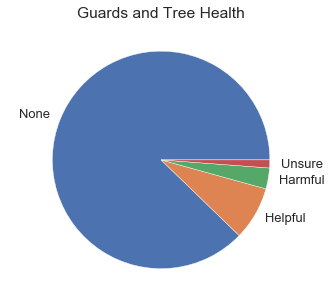

In [30]:
tree_guards_per.index = ['None', 'Helpful', 'Harmful', 'Unsure']
tree_guards_per.plot.pie(y='Percentage', figsize=(5, 5), legend=False).set_ylabel(' ')
plt.title('Guards and Tree Health')
plt.show()

In [31]:
tree.groupby('guards')['health'].value_counts()

guards   health
Harmful  Good       15313
         Fair        3836
         Poor        1091
Helpful  Good       42602
         Fair        7159
         Poor        2061
None     Good      464503
         Fair       84057
         Poor       23169
Unsure   Good        5909
         Fair        1375
         Poor         460
Name: health, dtype: int64

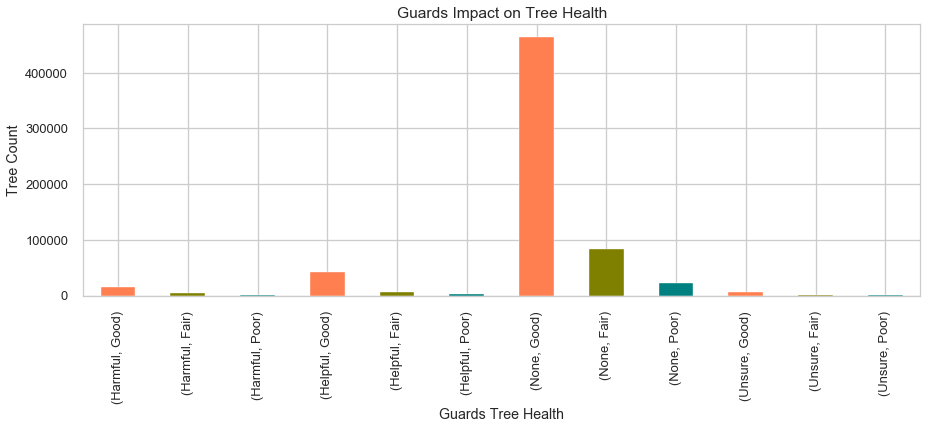

In [32]:
plt.figure(figsize=(15, 5))
tree.groupby('guards')['health'].value_counts().plot(kind='bar', color=['coral', 'olive', 'teal'])
plt.xlabel('Guards Tree Health')
plt.ylabel('Tree Count')
plt.title('Guards Impact on Tree Health')
plt.show()

In [33]:
tree.groupby('guards')['health'].value_counts(normalize=True)

guards   health
Harmful  Good      0.756571
         Fair      0.189526
         Poor      0.053903
Helpful  Good      0.822083
         Fair      0.138146
         Poor      0.039771
None     Good      0.812453
         Fair      0.147022
         Poor      0.040524
Unsure   Good      0.763042
         Fair      0.177557
         Poor      0.059401
Name: health, dtype: float64

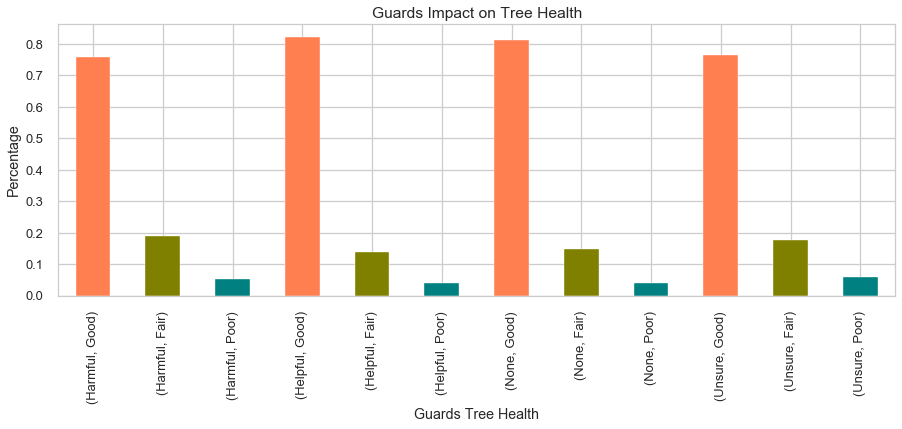

In [34]:
plt.figure(figsize=(15, 5))
tree.groupby('guards')['health'].value_counts(normalize=True).plot(kind='bar', color=['coral', 'olive', 'teal'])
plt.xlabel('Guards Tree Health')
plt.ylabel('Percentage')
plt.title('Guards Impact on Tree Health')
plt.show()

The majority of trees (87.76%) of trees do not have a guard. Based on viewer perceptions, those with a harmful guard have the lowest number of good trees (75.66%) and the highest number of fair trees (18.95%). Those with unsure guards have the highest number of poor trees (6.94%) while trees with helpful guards have the highest percentage of good trees (82.21%).

## Sidewalks Impact on Tree Health

Sidewalks are described as 'whether one of the sidewalk flags immediately adjacent to the tree was damaged, cracked, or lifted.'

In [35]:
tree_sidewalk = tree.sidewalk.value_counts().reset_index()
tree_sidewalk.columns = ['Sidewalk', 'Count']
tree_sidewalk

Sidewalk   Count
0  NoDamage  464516
1    Damage  187019

In [36]:
tree_sidewalk_per = tree.sidewalk.value_counts(normalize=True).reset_index()
tree_sidewalk_per.columns = ['Sidewalk', 'Percentage']
tree_sidewalk_per

Sidewalk  Percentage
0  NoDamage    0.712956
1    Damage    0.287044

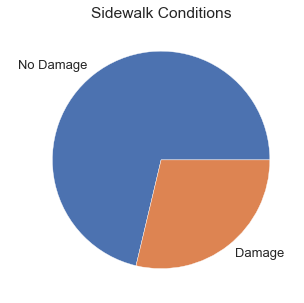

In [37]:
tree_sidewalk_per.index = ['No Damage', 'Damage']
tree_sidewalk_per.plot.pie(y='Percentage', figsize=(5, 5), legend=False).set_ylabel(' ')
plt.title('Sidewalk Conditions')
plt.show()

In [38]:
tree.groupby('sidewalk')['health'].value_counts()

sidewalk  health
Damage    Good      151750
          Fair       28676
          Poor        6593
NoDamage  Good      376577
          Fair       67751
          Poor       20188
Name: health, dtype: int64

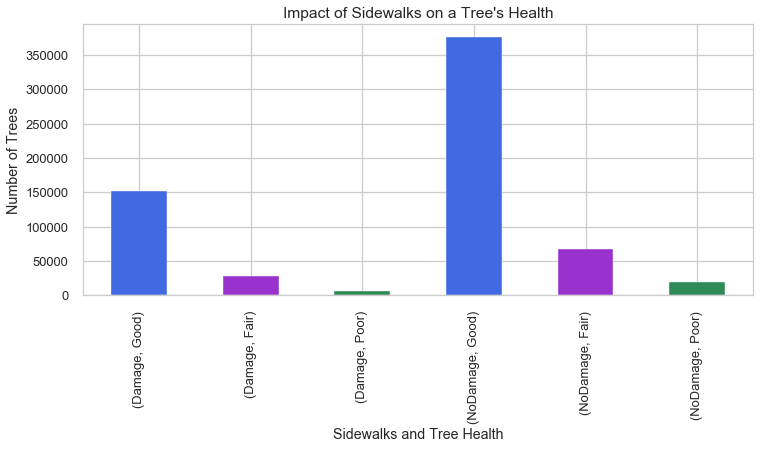

In [39]:
plt.figure(figsize=(12, 5))
tree.groupby('sidewalk')['health'].value_counts().plot(kind='bar', color=['royalblue', 'darkorchid', 'seagreen'])
plt.xlabel('Sidewalks and Tree Health')
plt.ylabel('Number of Trees')
plt.title('Impact of Sidewalks on a Tree\'s Health')
plt.show()

In [40]:
tree.groupby('sidewalk')['health'].value_counts(normalize=True)

sidewalk  health
Damage    Good      0.811415
          Fair      0.153332
          Poor      0.035253
NoDamage  Good      0.810687
          Fair      0.145853
          Poor      0.043460
Name: health, dtype: float64

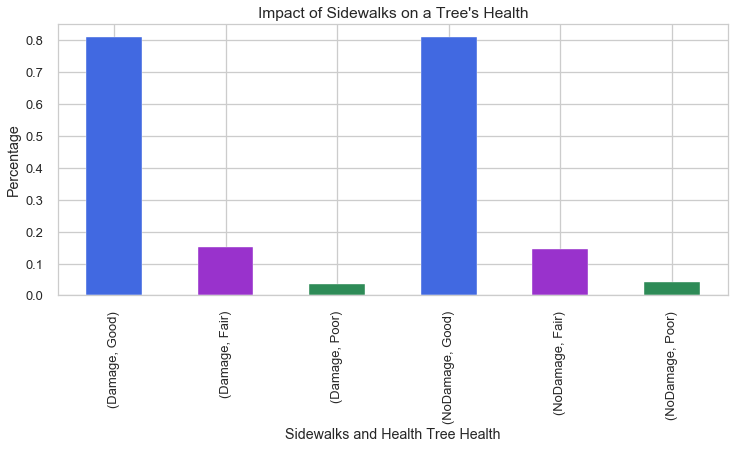

In [41]:
plt.figure(figsize=(12, 5))
tree.groupby('sidewalk')['health'].value_counts(normalize=True).plot(kind='bar', color=['royalblue', 'darkorchid', 'seagreen'])
plt.xlabel('Sidewalks and Health Tree Health')
plt.ylabel('Percentage')
plt.title('Impact of Sidewalks on a Tree\'s Health')
plt.show()

The distribution of good, fair, and poor trees is similar between sidewalks with and without damage.

## Curb Location of Tree Beds

This is the 'location of tree bed in relationship to the curb; trees are either along the curb (OnCurb) or offset from the curb (OffsetFromCurb).'

In [42]:
tree_curbs = tree.curb_loc.value_counts().reset_index()
tree_curbs.columns = ['Curb', 'Count']
tree_curbs

Curb   Count
0          OnCurb  625736
1  OffsetFromCurb   25799

In [43]:
tree_curbs_per = tree.curb_loc.value_counts(normalize=True).reset_index()
tree_curbs_per.columns = ['Curb', 'Percentage']
tree_curbs_per

Curb  Percentage
0          OnCurb    0.960403
1  OffsetFromCurb    0.039597

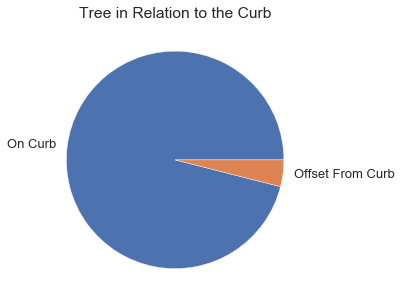

In [44]:
tree_curbs_per.index = ['On Curb', 'Offset From Curb']
tree_curbs_per.plot.pie(y='Percentage', figsize=(5, 5), legend=False).set_ylabel(' ')
plt.title('Tree in Relation to the Curb')
plt.show()

In [45]:
tree.groupby('curb_loc')['health'].value_counts()

curb_loc        health
OffsetFromCurb  Good       20814
                Fair        4022
                Poor         963
OnCurb          Good      507513
                Fair       92405
                Poor       25818
Name: health, dtype: int64

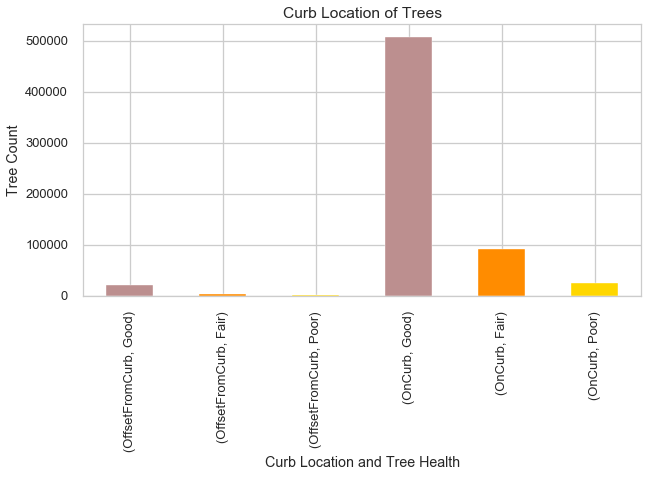

In [46]:
plt.figure(figsize=(10, 5))
tree.groupby('curb_loc')['health'].value_counts().plot(kind='bar', color=['rosybrown', 'darkorange', 'gold'])
plt.xlabel('Curb Location and Tree Health')
plt.ylabel('Tree Count')
plt.title('Curb Location of Trees')
plt.show()

In [47]:
tree.groupby('curb_loc')['health'].value_counts(normalize=True)

curb_loc        health
OffsetFromCurb  Good      0.806775
                Fair      0.155898
                Poor      0.037327
OnCurb          Good      0.811066
                Fair      0.147674
                Poor      0.041260
Name: health, dtype: float64

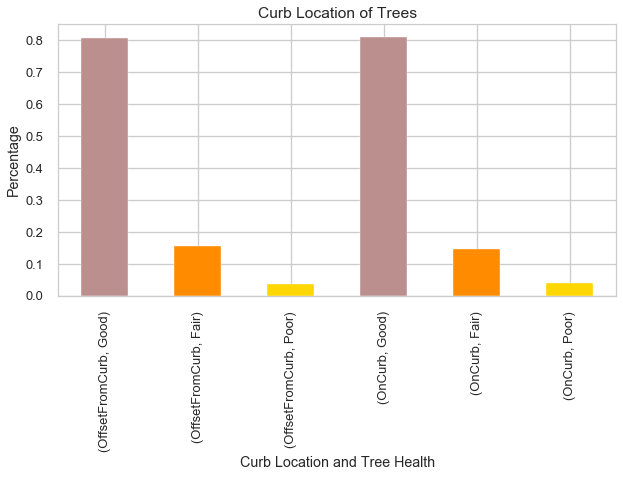

In [48]:
plt.figure(figsize=(10, 5))
tree.groupby('curb_loc')['health'].value_counts(normalize=True).plot(kind='bar', color=['rosybrown', 'darkorange', 'gold'])
plt.xlabel('Curb Location and Tree Health')
plt.ylabel('Percentage')
plt.title('Curb Location of Trees')
plt.show()

The proportion of good trees on the curb is slightly greater than trees that are offset from the curb. The difference is marginal. Interesingly, there are more poor trees on the curb in proportion to offset from the curb.

## Tree Diameter Distribution

In [49]:
tree[['health', 'tree_dbh']].groupby('health', as_index=False).mean()

health   tree_dbh
0   Fair  10.954370
1   Good  11.942466
2   Poor   8.985064

The healthiest trees, labeled 'good', have the largest diameters while the 'poor' trees have the smallest diameters, on average.

In [50]:
# for good measure, let's see if the same is true if we take the median instead of the mean

tree[['health', 'tree_dbh']].groupby('health', as_index=False).median()

health  tree_dbh
0   Fair         9
1   Good        10
2   Poor         7

In [51]:
# distribution of diameters

tree.groupby('health')['tree_dbh'].describe()

count       mean      std  min  25%   50%   75%   max
health                                                          
Fair     96427.0  10.954370  7.61766  1.0  5.0   9.0  15.0  50.0
Good    528327.0  11.942466  8.53741  1.0  5.0  10.0  17.0  50.0
Poor     26781.0   8.985064  6.74574  1.0  4.0   7.0  12.0  50.0

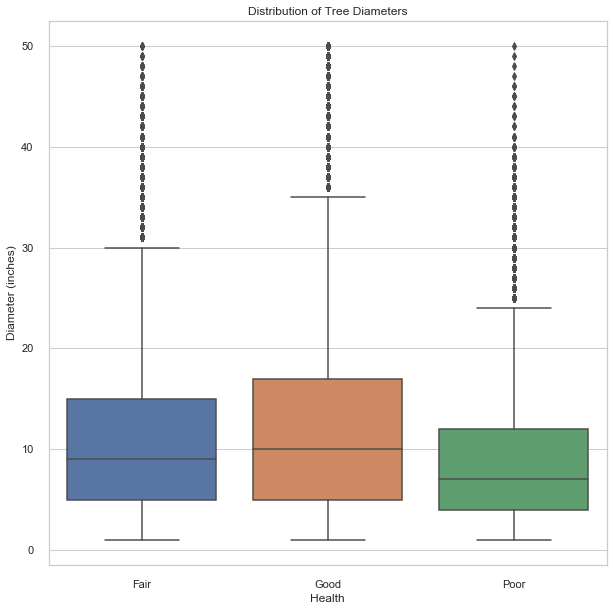

In [52]:
diadata = tree[['health', 'tree_dbh']]

sns.set(style="whitegrid")
plt.figure(figsize=(10, 10))
ax = sns.boxplot(x='health', y='tree_dbh', data=diadata)
ax.set_xlabel('Health')
ax.set_ylabel('Diameter (inches)')
ax.set_title('Distribution of Tree Diameters')
plt.show()

Good trees have higher averages and medians compared to fair and poor trees. They are, on average, almost one inch wider than fair trees and three inches wider than poor trees. Looking at their medians, good trees are again on top with 10 inches, followed by fair trees at 9 inches, and poor trees have 9 inches as their median.

## What Kinds of Trees Are Grown in the City?

In [53]:
tree.spc_common.unique() # take a look at all the different trees grown in NYC

array(['red maple', 'pin oak', 'honeylocust', 'American linden',
       'London planetree', 'ginkgo', 'willow oak', 'sycamore maple',
       'Amur maple', 'hedge maple', 'American elm', 'ash', 'crab apple',
       'silver maple', 'Turkish hazelnut', 'black cherry',
       'eastern redcedar', 'Norway maple', 'tulip-poplar', 'sawtooth oak',
       'swamp white oak', 'Sophora', 'Chinese fringetree',
       'southern magnolia', 'sweetgum', 'Callery pear', 'scarlet oak',
       'Atlantic white cedar', 'black oak', 'Japanese zelkova',
       'white oak', 'Ohio buckeye', 'northern red oak', 'silver linden',
       'pignut hickory', 'Kentucky yellowwood', 'mulberry', 'Douglas-fir',
       'crepe myrtle', 'sassafras', 'cherry', 'spruce', 'Chinese elm',
       'horse chestnut', 'holly', 'littleleaf linden', 'white pine',
       'blackgum', 'Japanese tree lilac', 'hardy rubber tree',
       'green ash', 'English oak', 'white ash', 'golden raintree',
       "Schumard's oak", 'Siberian elm', 'black

In [54]:
tree.spc_common.nunique() # number of unique trees

132

There are 132 different types of trees grown in NYC. Let's see which ones are the most popular.

In [55]:
tree.spc_common.value_counts().head(20) # show top 20

London planetree     86924
honeylocust          64239
Callery pear         58888
pin oak              53129
Norway maple         34176
littleleaf linden    29726
Japanese zelkova     29248
cherry               29244
ginkgo               21010
Sophora              19332
red maple            17241
green ash            16244
American linden      13524
silver maple         12223
sweetgum             10649
northern red oak      8367
silver linden         7993
American elm          7963
maple                 7067
purple-leaf plum      6873
Name: spc_common, dtype: int64

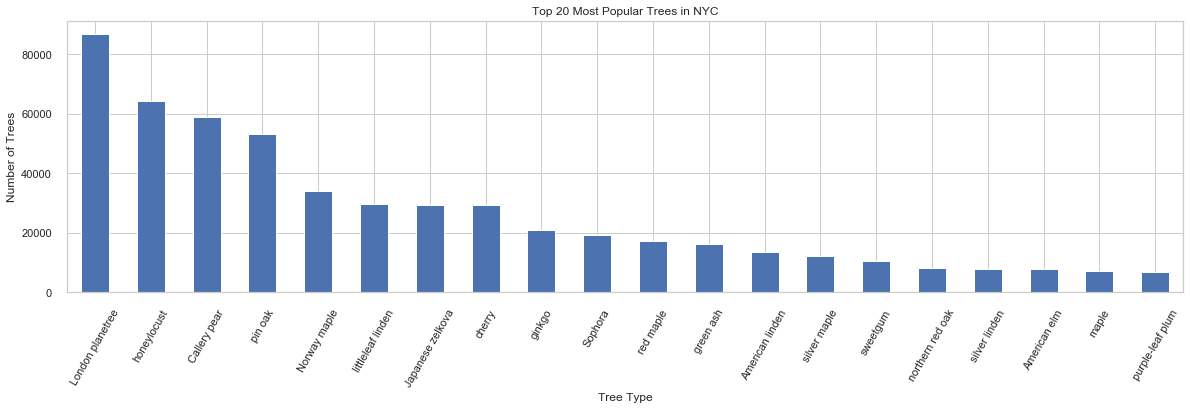

In [56]:
plt.figure(figsize=(20, 5))

tree.spc_common.value_counts().head(20).plot(kind='bar', title='Top 20 Most Popular Trees in NYC')
plt.xticks(rotation=60)
plt.xlabel('Tree Type')
plt.ylabel('Number of Trees')
plt.show()

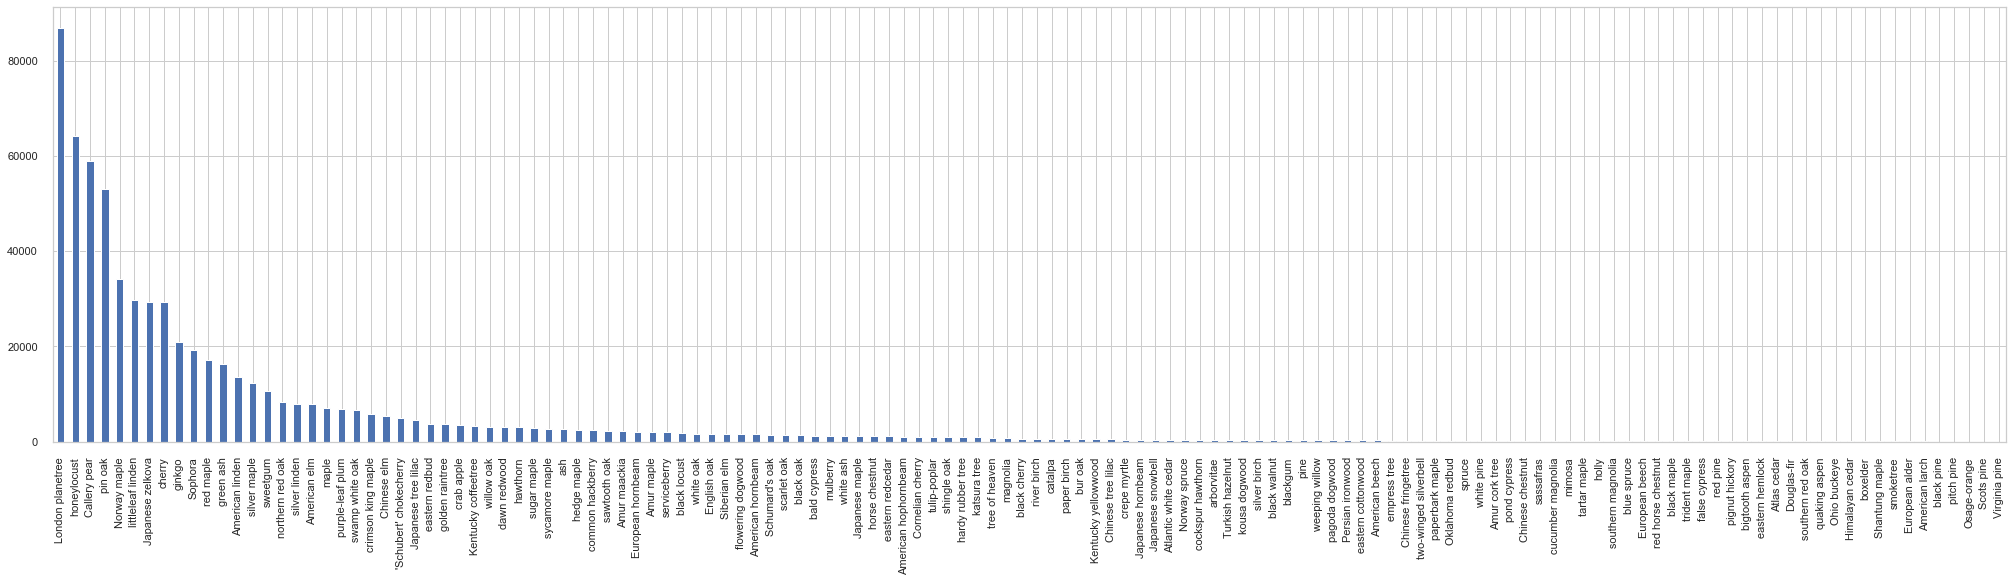

In [57]:
tree.spc_common.value_counts().plot(kind='bar', figsize=(35, 8))
plt.show()

## What Are the Most Popular Trees Grown in Each Borough?

### Bronx

In [58]:
tree_type_bronx = tree[tree.borough == 'Bronx']['spc_common'].value_counts().head(10).reset_index()
tree_type_bronx.columns = ['Tree', 'Count']
tree_type_bronx

Tree  Count
0        honeylocust   9685
1   London planetree   7507
2            pin oak   6440
3       Callery pear   4942
4   Japanese zelkova   4636
5             cherry   4084
6  littleleaf linden   3915
7       Norway maple   3374
8             ginkgo   2682
9            Sophora   2555

### Brooklyn

In [59]:
tree_type_brooklyn = tree[tree.borough == 'Brooklyn']['spc_common'].value_counts().head(10).reset_index()
tree_type_brooklyn.columns = ['Tree', 'Count']
tree_type_brooklyn

Tree  Count
0   London planetree  34860
1        honeylocust  16916
2            pin oak  12339
3   Japanese zelkova   9656
4       Callery pear   9077
5  littleleaf linden   8896
6       Norway maple   6988
7            Sophora   5987
8             cherry   5700
9             ginkgo   5589

### Manhattan

In [60]:
tree_type_manhattan = tree[tree.borough == 'Manhattan']['spc_common'].value_counts().head(10).reset_index()
tree_type_manhattan.columns = ['Tree', 'Count']
tree_type_manhattan

Tree  Count
0        honeylocust  13168
1       Callery pear   7295
2             ginkgo   5858
3            pin oak   4583
4            Sophora   4453
5   London planetree   4122
6   Japanese zelkova   3596
7  littleleaf linden   3331
8       American elm   1696
9    American linden   1583

### Queens

In [61]:
tree_type_queens = tree[tree.borough == 'Queens']['spc_common'].value_counts().head(10).reset_index()
tree_type_queens.columns = ['Tree', 'Count']
tree_type_queens

Tree  Count
0   London planetree  31076
1            pin oak  22575
2        honeylocust  20285
3       Norway maple  19400
4       Callery pear  16539
5             cherry  13485
6  littleleaf linden  11899
7   Japanese zelkova   8982
8          green ash   7388
9       silver maple   6080

### Staten Island

In [62]:
tree_type_staten = tree[tree.borough == 'Staten Island']['spc_common'].value_counts().head(10).reset_index()
tree_type_staten.columns = ['Tree', 'Count']
tree_type_staten

Tree  Count
0      Callery pear  21035
1  London planetree   9359
2         red maple   7369
3           pin oak   7192
4            cherry   5107
5          sweetgum   5003
6       honeylocust   4185
7      Norway maple   4124
8      silver maple   4039
9             maple   2609

## What Kinds of Problems Do the Trees Have?

In [63]:
tree_problems = tree.problems # locate overall problems

In [64]:
tree_problems.sample(10)

605709                 RootOther
75294         Stones,BranchOther
36892                       None
70701                       None
57329           Stones,RootOther
464660    WiresRope,BranchLights
2534                        None
162282        Stones,BranchOther
397652                    Stones
354891                    Stones
Name: problems, dtype: object

In [65]:
problems = [] # append values to a list, split items like 'Stones,BranchOther' into 'Stones', 'BranchOther'

for item in tree_problems:
    if ',' in item:
        split_str = item.split(',')
        problems.append(split_str)
    else:
        problems.append(item)

In [66]:
flat_problems = [] # separate the strings in the list of lists and combine them all into one list

for x in range(len(problems)):
    if isinstance(problems[x], list) == True:
        for subitem in problems[x]:
            flat_problems.append(subitem)
    else:
        flat_problems.append(problems[x])

In [67]:
series_problems = pd.Series(flat_problems) # display occurences of each problem

series_problems.value_counts()

None            425892
Stones          139862
BranchLights     62313
TrunkOther       32546
RootOther        30291
BranchOther      24339
WiresRope        13255
MetalGrates       3535
TrunkLights       1031
Sneakers           409
dtype: int64

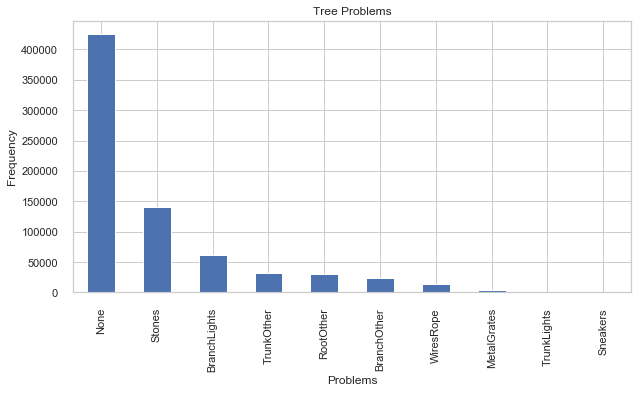

In [68]:
series_problems.value_counts().plot(kind='bar', title='Tree Problems', figsize=(10, 5))
plt.xlabel('Problems')
plt.ylabel('Frequency')
plt.show()

The majority of trees do not have any problems, which is understandable since most trees are in good health.

## Does the Number of Problems Increase as the Health of a Tree Decreases?

In [69]:
# count how many problems a tree has
# find the correlation between the number of problems and the health of the tree

# create a new column that states how many problems a tree has

num_of_problems = [] # list of number of tree problems

for x in range(len(problems)):
    if isinstance(problems[x], list) == True: # multiple tree problems are stored in a list
        num_of_problems.append(len(problems[x]))
    if problems[x] == 'None':
        num_of_problems.append(0)
    if (problems[x] != 'None') and (isinstance(problems[x], list) != True): # singluar problem, listed as a string
        num_of_problems.append(1)

In [70]:
# create a new column and set its values equal to the corresponding num_of_problems list

tree['num_problems'] = num_of_problems

In [71]:
# sample new dataset

tree.sample(5)

tree_id  tree_dbh curb_loc health      spc_common steward   guards  \
301795   501120         3   OnCurb   Good          cherry    None     None   
100881   298620         2   OnCurb   Good  eastern redbud    1or2     None   
451835   632259        10   OnCurb   Good  sycamore maple    None     None   
337151   553287        15   OnCurb   Good    Norway maple    None     None   
242553   433634         4   OnCurb   Good     hedge maple    1or2  Helpful   

        sidewalk             problems root_stone  ... trunk_wire trnk_light  \
301795    Damage                 None         No  ...         No         No   
100881  NoDamage                 None         No  ...         No         No   
451835    Damage  Stones,BranchLights        Yes  ...         No         No   
337151  NoDamage                 None         No  ...         No         No   
242553  NoDamage                 None         No  ...         No         No   

       trnk_other brch_light brch_shoe brch_other   borough  longitude  \
301795         No         No        No         No     Bronx -73.863291   
100881         No         No        No         No  Brooklyn -73.955870   
451835         No        Yes        No         No  Brooklyn -73.938193   
337151         No         No        No         No     Bronx -73.862930   
242553         No         No        No         No  Brooklyn -73.929449   

         latitude  num_problems  
301795  40.870495             0  
100881  40.611058             0  
451835  40.633595             2  
337151  40.852595             0  
242553  40.658333             0  

[5 rows x 22 columns]

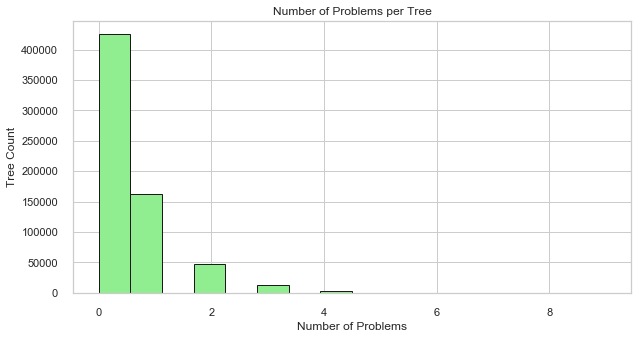

In [72]:
tree.num_problems.plot(kind='hist', color='lightgreen', bins=16, edgecolor='k', figsize=(10, 5)) # plot the number of problems a tree has
plt.title('Number of Problems per Tree')
plt.xlabel('Number of Problems')
plt.ylabel('Tree Count')
plt.show()

In [73]:
tree[['num_problems']].describe()

num_problems
count  651535.000000
mean        0.472087
std         0.754487
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         9.000000

Since the majority of trees have 0 problems, we want to view the statistics of trees with at least one problem.

In [74]:
prob_one_more = tree[tree.num_problems > 0] # filter for trees with at least 1 problem

prob_one_more[['num_problems']].describe()

num_problems
count  225643.000000
mean        1.363131
std         0.655040
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         9.000000

The majority of trees have one problem until around the 75th percentile, which shows 2 problems per tree. The most problematic trees have 9 problems!

In [75]:
# distribution of number of problems by tree health

tree.groupby('health')['num_problems'].describe()

count      mean       std  min  25%  50%  75%  max
health                                                       
Fair     96427.0  0.643658  0.872558  0.0  0.0  0.0  1.0  7.0
Good    528327.0  0.430014  0.710553  0.0  0.0  0.0  1.0  7.0
Poor     26781.0  0.684328  0.980530  0.0  0.0  0.0  1.0  9.0

In [76]:
# distribution of trees with at least one problem

prob_one_more.groupby('health')['num_problems'].describe()

count      mean       std  min  25%  50%  75%  max
health                                                       
Fair     42512.0  1.459964  0.731541  1.0  1.0  1.0  2.0  7.0
Good    171836.0  1.322121  0.610611  1.0  1.0  1.0  2.0  7.0
Poor     11295.0  1.622576  0.870184  1.0  1.0  1.0  2.0  9.0

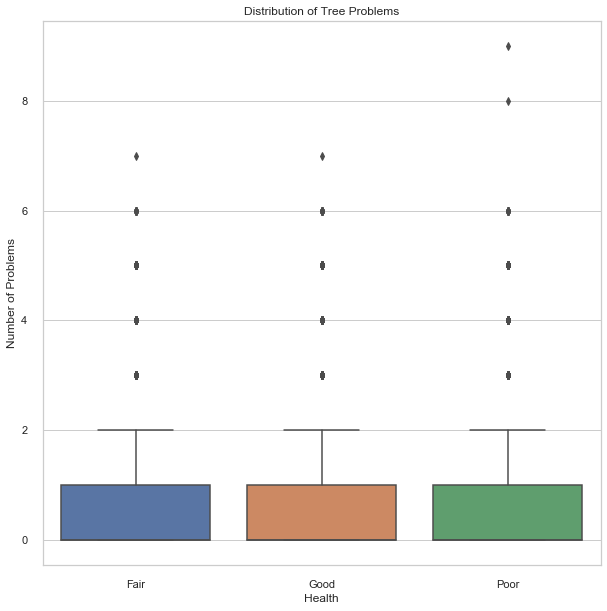

In [77]:
# all boxplots together

boxdata = tree[['health', 'num_problems']]

sns.set(style="whitegrid")
plt.figure(figsize=(10, 10))
ax = sns.boxplot(x='health', y='num_problems', data=boxdata)
ax.set_xlabel('Health')
ax.set_ylabel('Number of Problems')
ax.set_title('Distribution of Tree Problems')
plt.show()

In [78]:
# most common types of good trees

tree[tree.health == 'Good'].spc_common.value_counts().head(10)

London planetree     73224
honeylocust          54483
Callery pear         48035
pin oak              45513
Japanese zelkova     25277
cherry               24494
littleleaf linden    23573
Norway maple         21240
ginkgo               17113
Sophora              15827
Name: spc_common, dtype: int64

In [79]:
# most common types of fair trees

tree[tree.health == 'Fair'].spc_common.value_counts().head(10)

London planetree     11504
Norway maple          9159
Callery pear          8767
honeylocust           8568
pin oak               6383
littleleaf linden     4438
cherry                3446
Japanese zelkova      3189
red maple             2911
Sophora               2889
Name: spc_common, dtype: int64

In [80]:
# most common types of poor trees

tree[tree.health == 'Poor'].spc_common.value_counts().head(10)

Norway maple         3777
London planetree     2196
Callery pear         2086
littleleaf linden    1715
cherry               1304
pin oak              1233
honeylocust          1188
ginkgo               1118
red maple             896
Japanese zelkova      782
Name: spc_common, dtype: int64

## Locating Trees in NYC

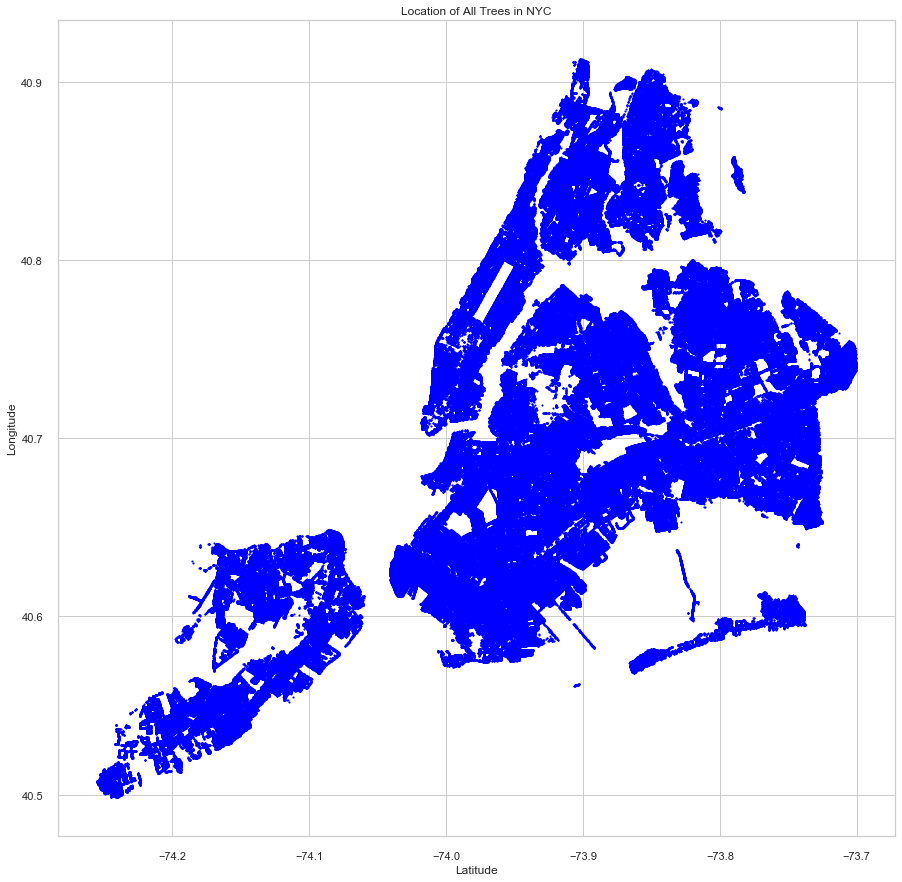

In [81]:
plt.figure(figsize=(15, 15))
plt.scatter(tree.longitude, tree.latitude, c='blue', marker='.', s=5)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Location of All Trees in NYC')
plt.show()

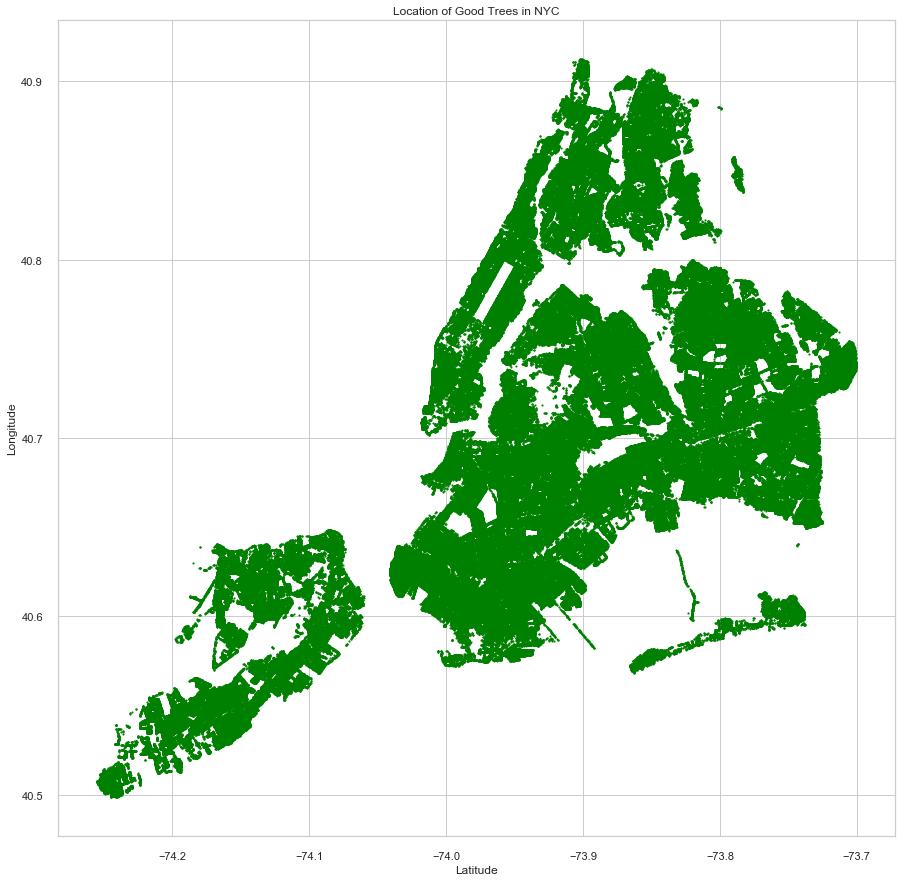

In [82]:
good_trees = tree[tree.health == 'Good'][['longitude', 'latitude']]
fair_trees = tree[tree.health == 'Fair'][['longitude', 'latitude']]
poor_trees = tree[tree.health == 'Poor'][['longitude', 'latitude']]

plt.figure(figsize=(15, 15))
plt.scatter(good_trees.longitude, good_trees.latitude, c='green', marker='.', s=5)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Location of Good Trees in NYC')
plt.show()

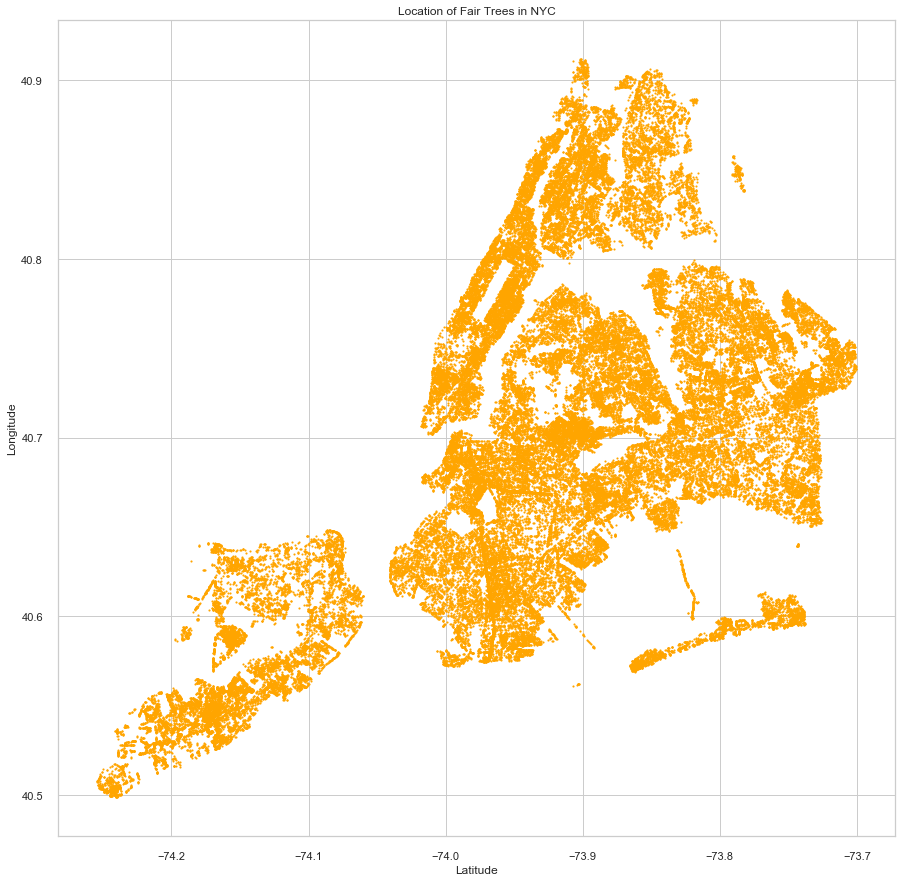

In [83]:
plt.figure(figsize=(15, 15))
plt.scatter(fair_trees.longitude, fair_trees.latitude, c='orange', marker='.', s=5)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Location of Fair Trees in NYC')
plt.show()

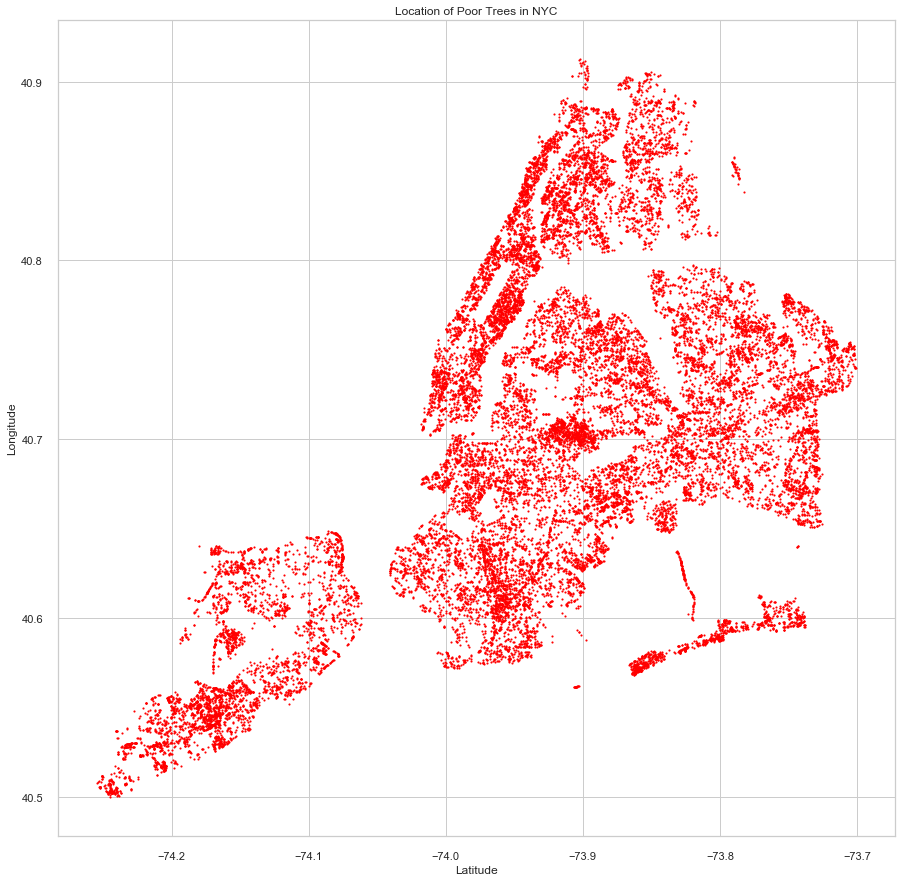

In [84]:
plt.figure(figsize=(15, 15))
plt.scatter(poor_trees.longitude, poor_trees.latitude, c='red', marker='.', s=5)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Location of Poor Trees in NYC')
plt.show()

## Do Root Problems Affect the Health of Trees?

There are three types of root problems for trees: 
- root_stone - Indicates the presence of a root problem caused by paving stones in tree bed
- root_grate - Indicates the presence of a root problem caused by metal grates in tree bed
- root_other - Indicates the presence of other root problems	

In [85]:
tree_root_stone = tree.root_stone.value_counts().reset_index()
tree_root_stone.columns = ['Stone', 'Count']
tree_root_stone

Stone   Count
0    No  511673
1   Yes  139862

In [86]:
tree.groupby('health').root_stone.value_counts()

health  root_stone
Fair    No             72946
        Yes            23481
Good    No            417128
        Yes           111199
Poor    No             21599
        Yes             5182
Name: root_stone, dtype: int64

In [87]:
tree_root_grate = tree.root_grate.value_counts().reset_index()
tree_root_grate.columns = ['Grate', 'Count']
tree_root_grate

Grate   Count
0    No  648000
1   Yes    3535

In [88]:
tree.groupby('health').root_grate.value_counts()

health  root_grate
Fair    No             95575
        Yes              852
Good    No            525898
        Yes             2429
Poor    No             26527
        Yes              254
Name: root_grate, dtype: int64

In [89]:
tree_root_other = tree.root_other.value_counts().reset_index()
tree_root_other.columns = ['Other', 'Count']
tree_root_other

Other   Count
0    No  621244
1   Yes   30291

In [90]:
tree.groupby('health').root_other.value_counts()

health  root_other
Fair    No             89941
        Yes             6486
Good    No            506637
        Yes            21690
Poor    No             24666
        Yes             2115
Name: root_other, dtype: int64

## Do Trunk Problems Affect the Health of a Tree?

There are three problems encountered by trees:
- trunk_wire - Indicates the presence of a trunk problem caused by wires or rope wrapped around the trunl
- trnk_light - Indicates the presence of a trunk problem caused by lighting installed on the tree
- trnk_other - Indicates the presence of other trunk problems	

In [91]:
tree_trunk_wire = tree.trunk_wire.value_counts().reset_index()
tree_trunk_wire.columns = ['Wire', 'Count']
tree_trunk_wire

Wire   Count
0   No  638280
1  Yes   13255

In [92]:
tree.groupby('health').trunk_wire.value_counts()

health  trunk_wire
Fair    No             93663
        Yes             2764
Good    No            518587
        Yes             9740
Poor    No             26030
        Yes              751
Name: trunk_wire, dtype: int64

In [93]:
tree_trunk_light = tree.trnk_light.value_counts().reset_index()
tree_trunk_light.columns = ['Light', 'Count']
tree_trunk_light

Light   Count
0    No  650504
1   Yes    1031

In [94]:
tree.groupby('health').trnk_light.value_counts()

health  trnk_light
Fair    No             96211
        Yes              216
Good    No            527573
        Yes              754
Poor    No             26720
        Yes               61
Name: trnk_light, dtype: int64

In [95]:
tree_trunk_other = tree.trnk_other.value_counts().reset_index()
tree_trunk_other.columns = ['Other', 'Count']
tree_trunk_other

Other   Count
0    No  618989
1   Yes   32546

In [96]:
tree.groupby('health').trnk_other.value_counts()

health  trnk_other
Fair    No             87054
        Yes             9373
Good    No            509068
        Yes            19259
Poor    No             22867
        Yes             3914
Name: trnk_other, dtype: int64

## Do Branch Problems Affect the Health of a Tree?

There are three possible problems with a tree's branches:
- brch_light - Indicates the presence of a branch problem caused by lights (usually string lights) or wires in the branches
- brch_shoe - Indicates the presence of a branch problem caused by sneakers in the branches
- brch_other - Indicates the presence of other branch problems	

In [97]:
tree_branch_light = tree.brch_light.value_counts().reset_index()
tree_branch_light.columns = ['Light', 'Count']
tree_branch_light

Light   Count
0    No  589222
1   Yes   62313

In [98]:
tree.groupby('health').brch_light.value_counts()

health  brch_light
Fair    No             85509
        Yes            10918
Good    No            479300
        Yes            49027
Poor    No             24413
        Yes             2368
Name: brch_light, dtype: int64

In [99]:
tree_branch_shoe = tree.brch_shoe.value_counts().reset_index()
tree_branch_shoe.columns = ['Shoes', 'Count']
tree_branch_shoe

Shoes   Count
0    No  651126
1   Yes     409

In [100]:
tree.groupby('health').brch_shoe.value_counts()

health  brch_shoe
Fair    No            96333
        Yes              94
Good    No           528042
        Yes             285
Poor    No            26751
        Yes              30
Name: brch_shoe, dtype: int64

In [101]:
tree_branch_other = tree.brch_other.value_counts().reset_index()
tree_branch_other.columns = ['Other', 'Count']
tree_branch_other

Other   Count
0    No  627196
1   Yes   24339

In [102]:
tree.groupby('health').brch_other.value_counts()

health  brch_other
Fair    No             88545
        Yes             7882
Good    No            515522
        Yes            12805
Poor    No             23129
        Yes             3652
Name: brch_other, dtype: int64

Let's isolate the columns problems to borough to see if there are any patterns.

In [103]:
tree_probs_spec = tree[['problems', 'root_stone', 'root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other', 'brch_light', 'brch_shoe', 'brch_other']]
tree_probs_spec.sample(10)

problems root_stone root_grate root_other  \
663491                            Stones        Yes         No         No   
388071                              None         No         No         No   
242679                            Stones        Yes         No         No   
282798                              None         No         No         No   
34997                               None         No         No         No   
447285                              None         No         No         No   
320099                              None         No         No         No   
453522                              None         No         No         No   
415962               Stones,BranchLights        Yes         No         No   
242607  RootOther,TrunkOther,BranchOther         No         No        Yes   

       trunk_wire trnk_light trnk_other brch_light brch_shoe brch_other  
663491         No         No         No         No        No         No  
388071         No         No         No         No        No         No  
242679         No         No         No         No        No         No  
282798         No         No         No         No        No         No  
34997          No         No         No         No        No         No  
447285         No         No         No         No        No         No  
320099         No         No         No         No        No         No  
453522         No         No         No         No        No         No  
415962         No         No         No        Yes        No         No  
242607         No         No        Yes         No        No        Yes

The columns root_stone, root_grate, root_other, trunk_wire, trnk_light, trnk_other, brch_light, brch_shoe, and brch_other indicate all the problems listed under the problems column. For example, if a tree (46803) has 'RootOther,WiresRope,TrunkLights' listed under problems, then the columns root_other, trunk_wire, and trnk_light show a Yes while the others show No.

In [104]:
tree.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 651535 entries, 0 to 683787
Data columns (total 22 columns):
tree_id         651535 non-null int64
tree_dbh        651535 non-null int64
curb_loc        651535 non-null object
health          651535 non-null object
spc_common      651535 non-null object
steward         651535 non-null object
guards          651535 non-null object
sidewalk        651535 non-null object
problems        651535 non-null object
root_stone      651535 non-null object
root_grate      651535 non-null object
root_other      651535 non-null object
trunk_wire      651535 non-null object
trnk_light      651535 non-null object
trnk_other      651535 non-null object
brch_light      651535 non-null object
brch_shoe       651535 non-null object
brch_other      651535 non-null object
borough         651535 non-null object
longitude       651535 non-null float64
latitude        651535 non-null float64
num_problems    651535 non-null int64
dtypes: float64(2), int64(3), ob

In [105]:
# save updated dataset to file

# stree.to_csv('tree_census_stat_ready.csv')